In [5]:
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar


In [10]:

n_cell=1e4
rule_number = 18
rule_string = np.binary_repr(rule_number, 8)
rule = np.array([int(bit) for bit in rule_string])
print(rule)
data=np.random.randint(0,2,int(n_cell))

[0 0 0 1 0 0 1 0]


In [11]:
for i in range(8):
    triplet = np.binary_repr(i, 3)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 0
input:011, index:4, output 0
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0


In [12]:
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

In [13]:
all_triplets = np.stack([
    np.roll(data, 1),
    data,
    np.roll(data, -1)]
)
new_data = rule[np.apply_along_axis(rule_index, 0, all_triplets)]
print(new_data)

[0 0 0 ... 1 0 0]


In [14]:
def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

In [15]:
print("Initial", data)
data = CA_run(data, 5000, 18)
print("Final: ", data)

Initial [1 0 1 ... 0 1 1]
Final:  [[1. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


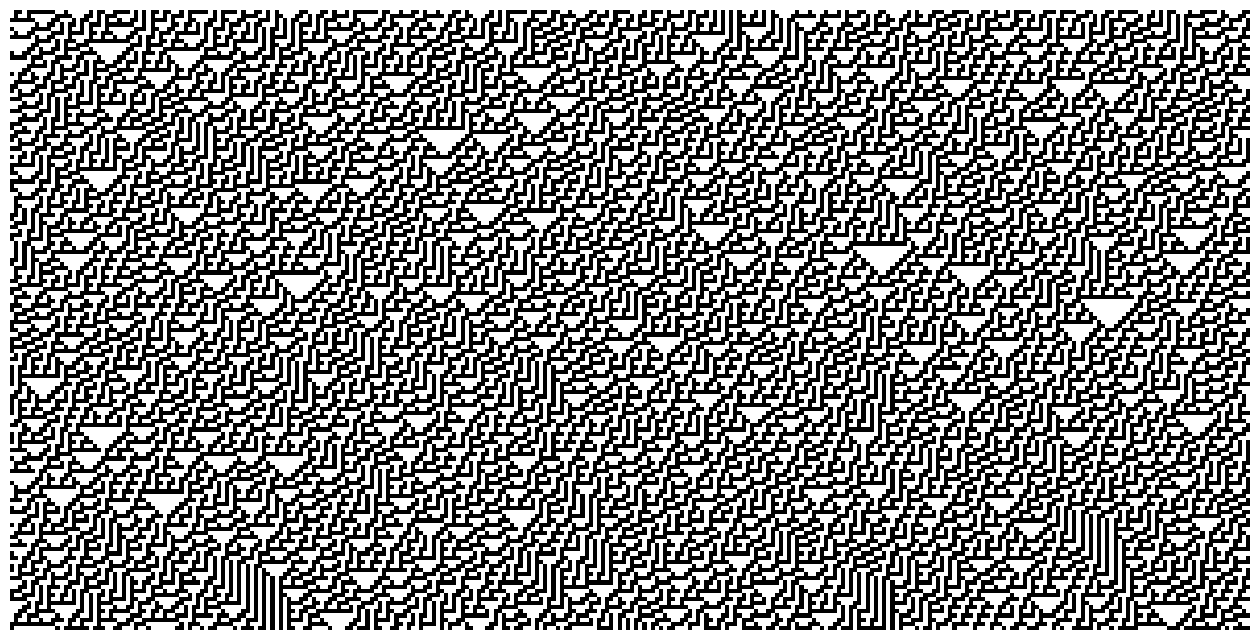

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'binary'

rng = np.random.RandomState(0)
data = CA_run(rng.randint(0, 2, 300), 150, 30)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);